# Subgradient Descent

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

#%matplotlib notebook
%matplotlib inline

# Define function plotting function
def plot_function(xdims, ydims, f, title, xstar):
    global fys

    # Prepare grid for plotting decision surface
    gx1, gx2 = np.meshgrid(
        np.arange(xdims[0], xdims[1], (xdims[1] - xdims[0]) / 50.0),
        np.arange(ydims[0], ydims[1], (ydims[1] - ydims[0]) / 50.0)
    )
    gx1l = gx1.flatten()
    gx2l = gx2.flatten()
    gx = np.vstack((gx1l, gx2l)).T

    # Compute a prediction for every point in the grid
    # Cache for fast redisplay
    if len(fys) == 0:
        y = f(gx)
        y = np.reshape(y, gx1.shape)
        fys = y
    else:
        y = fys

    # Plot a contour map of the function
    plt.contourf(
        gx1, gx2, y,
        levels=(np.linspace(0, np.max(y), 100))
    )
    plt.colorbar()
    plt.contour(
        gx1, gx2, y, linewidths=2, colors='k',
        levels=(np.linspace(0, np.max(y), 10))
    )

    plt.plot(xstar[0], xstar[1], 'r*')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(title)


def plot_step(x, xprime, alpha):
    plt.plot(
        [x[0], xprime[0]],
        [x[1], xprime[1]],
        '-w', alpha=alpha
    )


def plot_all_steps(xs):
    N = xs.shape[0]
    if N > 1:
        alpha = np.linspace(0.2, 1, N)
        for i in range(xs.shape[0] - 1):
            plot_step(xs[i, :], xs[i + 1, :], alpha[i])
    plt.plot(xs[-1, 0], xs[-1, 1], 'ow')


def optimiziation_plot(x, f, i, fbest, xstar):
    clear_output(wait=True)
    plt.figure(figsize=(16, 4))

    plt.subplot(1, 3, 1)
    plot_function([-10, 10], [-10, 10], q.f, "Objective Function (i=%d, fbest=%.2f)" % (i, fbest), xstar)
    plot_all_steps(x)

    plt.subplot(1, 3, 2)
    plot_function([-10, 10], [-10, 10], q.f, "Objective Function (i=%d, fbest=%.2f)" % (i, fbest), xstar)

    N = x.shape[0]
    back = max(0, N - 10)
    plot_all_steps(x)
    x0min = np.min(x[back:, 0])
    x0min = x0min - 0.05 * np.abs(x0min)
    x0max = np.max(x[back:, 0])
    x0max = x0max + 0.05 * np.abs(x0max)
    x1min = np.min(x[back:, 1])
    x1min = x1min - 0.05 * np.abs(x1min)
    x1max = np.max(x[back:, 1])
    x1max = x1max + 0.05 * np.abs(x1max)

    plt.xlim(x0min, x0max)
    plt.ylim(x1min, x1max)

    plt.subplot(1, 3, 3)
    plt.plot(f[:i], 'k-')
    plt.grid(True)
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function')
    plt.title("Objective vs Iteration (i=%d, fbest=%.2f)" % (i, fbest))

    plt.show()


# Absolute Value Subgradient Function

In [8]:
def abs_subgrad(x):
    y = np.zeros(x.shape)
    y[x < 0] = -1
    y[x == 0] = 0
    y[x > 0] = 1
    return y

Create Loss Function
===

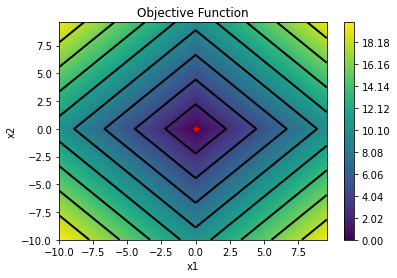

In [9]:
class sum_abs_func():
    def __init__(self, X):
        self.X = X
        self.fcount = 0
        self.gcount = 0

    def f(self, x):
        self.fcount += 1
        if x.shape[0] == 1:
            fx = np.sum(np.sum(np.abs(self.X - x[:, np.newaxis])))
            return fx
        else:
            fx = np.sum(np.sum(np.abs(self.X.T[np.newaxis, :, :] - x[:, :, np.newaxis]), axis=2), axis=1)
            return fx

    def g(self, x):
        self.gcount += 1

        g = np.zeros((2,))
        for i in range(self.X.shape[0]):
            g = g - abs_subgrad(self.X[i, :] - x)

        return g

    def reset_counts(self):
        self.fcount = 0
        self.gcount = 0


fys = []
data = np.array([[0, 0]])
xstar = np.median(data, axis=0)
q = sum_abs_func(data)

plt.figure(figsize=(6, 4))
plot_function([-10, 10], [-10, 10], q.f, "Objective Function", xstar)



## Subgradient Descent

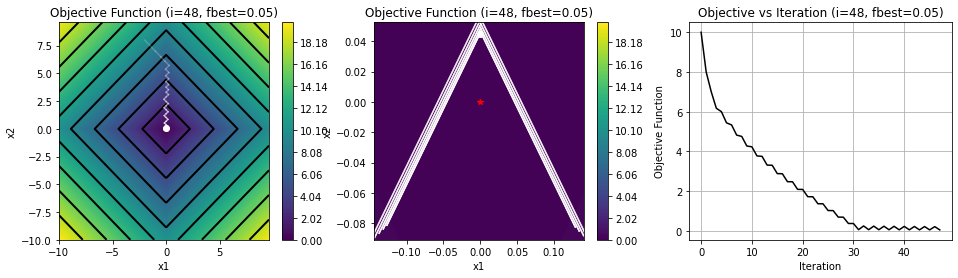

Number of function evals: 50
Number of gradient evals: 49
Minimizer: [-0.00, 0.04]. fbest=0.05


In [10]:
q.reset_counts()
x = np.zeros((100, 2))
f = np.zeros((100,))
x[0, :] = np.array([-2, 8])
f[0] = q.f(x[[0], :])
fbest = np.inf
xbest = x[0, :]
alpha = 1
tol = 1e-4
maxIter = 50
try:
    for i in range(maxIter - 1):
        alpha_k = (alpha / (1 + np.sqrt(i)))
        g = q.g(x[i, :])
        x[i + 1, :] = x[i, :] - alpha_k * g
        f[i + 1] = q.f(x[[i + 1], :])
        optimiziation_plot(x[:i + 2, :], f[:i + 2], i, fbest, xstar)
        if f[i + 1] < fbest:
            xbest = x[i + 1, :]
            fbest = f[i + 1]

        if abs(f[i + 1] - f[i]) / abs(f[i + 1]) < tol: break
except Exception as exp:
    print('Got exception: {}'.format(exp))

print("Number of function evals: %d" % (q.fcount))
print("Number of gradient evals: %d" % (q.gcount))
print("Minimizer: [%.2f, %.2f]. fbest=%.2f" % (xbest[0], xbest[1], fbest))

# Subgradient Descent with Nesterov Acceleration

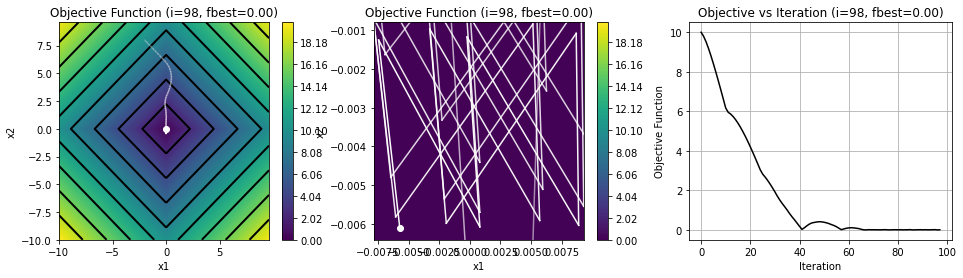

Got exception: index 100 is out of bounds for axis 0 with size 100
Number of function evals: 100
Number of gradient evals: 100
Minimizer: [-0.00, -0.00]. fbest=0.00


In [11]:
q.reset_counts()
x = np.zeros((100, 2))
f = np.zeros((100,))
x[0, :] = np.array([-2, 8])
f[0] = q.f(x[[0], :])
fbest = np.inf
xbest = x[0, :]
alpha = 0.1
gamma = 0.9
tol = 1e-4
maxIter = 100
g = np.zeros(x[0, :].shape)
d = np.zeros(x[0, :].shape)
n = 0
try:
    for i in range(maxIter):
        alpha_k = (alpha / (1 + np.sqrt(i)))
        g = q.g(x[i, :] - gamma * d)
        d = gamma * d + alpha_k * g
        x[i + 1, :] = x[i, :] - d

        f[i + 1] = q.f(x[[i + 1], :])
        optimiziation_plot(x[:i + 2, :], f[:i + 2], i, fbest, xstar)
        if f[i + 1] < fbest:
            xbest = x[i + 1, :]
            fbest = f[i + 1]
        if abs(f[i + 1] - f[i]) / abs(f[i + 1]) < tol: break
        n = n + 1
except Exception as exp:
    print('Got exception: {}'.format(exp))

print("Number of function evals: %d" % q.fcount)
print("Number of gradient evals: %d" % q.gcount)
print("Minimizer: [%.2f, %.2f]. fbest=%.2f" % (xbest[0], xbest[1], fbest))